In [2]:
import pandas as pd
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\zyesn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [3]:
df_job_country_salary = df.pivot_table(columns= 'job_title_short', values = 'salary_year_avg', index = 'job_country', aggfunc='median')

In [4]:
top_countries = df['job_country'].value_counts().head(6).index

In [5]:
df_job_country_salary = df_job_country_salary.loc[top_countries]

In [13]:
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


In [7]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

In [8]:
df_job_country_salary = df_job_country_salary[job_titles]

In [9]:
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


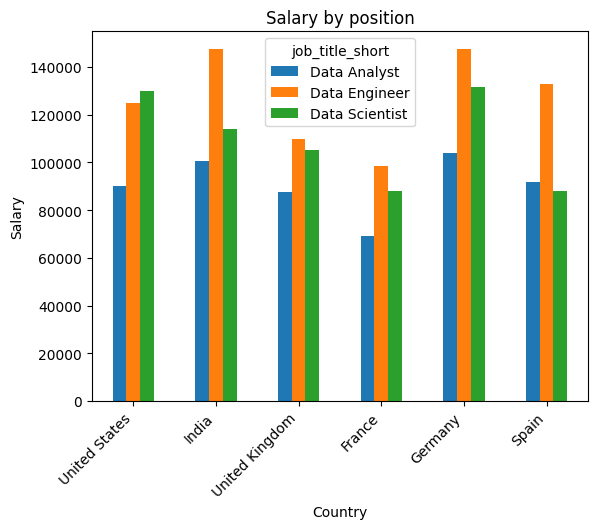

In [12]:
df_job_country_salary.plot(kind = 'bar')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary by position')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


In [14]:
df.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
729832,Senior Data Analyst,Sr. Data Analyst/Engineer,"Atlanta, GA",via LinkedIn,Full-time,False,Georgia,2023-01-12 22:19:35,False,False,United States,None,NaN,NaN,Sharecare,"['scala', 'python', 'java', 'sql', 'r', 'mongo...","{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
